In [1]:
#importing libraries

#reading data
import pandas as pd

#performing eda
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#feature engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder

#data modeling/machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# for warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading data
data = pd.read_csv(r"Customer-Churn.csv")

In [3]:
#data preview
data.head()

#data.shape

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#checking data features/columns
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

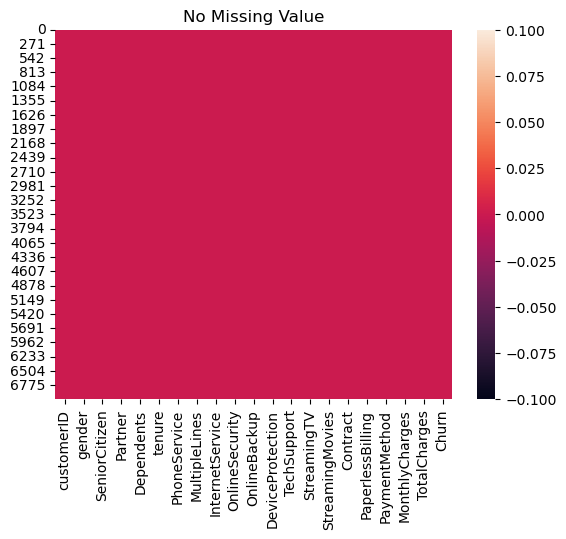

In [5]:
#checking for missing values
a= data.isna()

#visualizing missing values
sns.heatmap(a);
plt.title("No Missing Value");

In [6]:
#identifying categorical columns
categorical_columns = data.describe(include=["object", "bool"])

categorical_columns

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


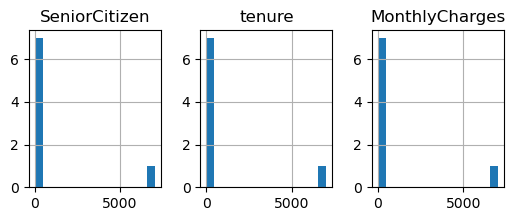

In [7]:
#identifying numerical columns
numerical_columns = data.describe(include=["integer", "float"])


numerical_columns
#Visualizing the distribution of numerical features
numerical_columns.hist(bins=15, figsize=(15, 10), layout=(4, 7))
plt.show()

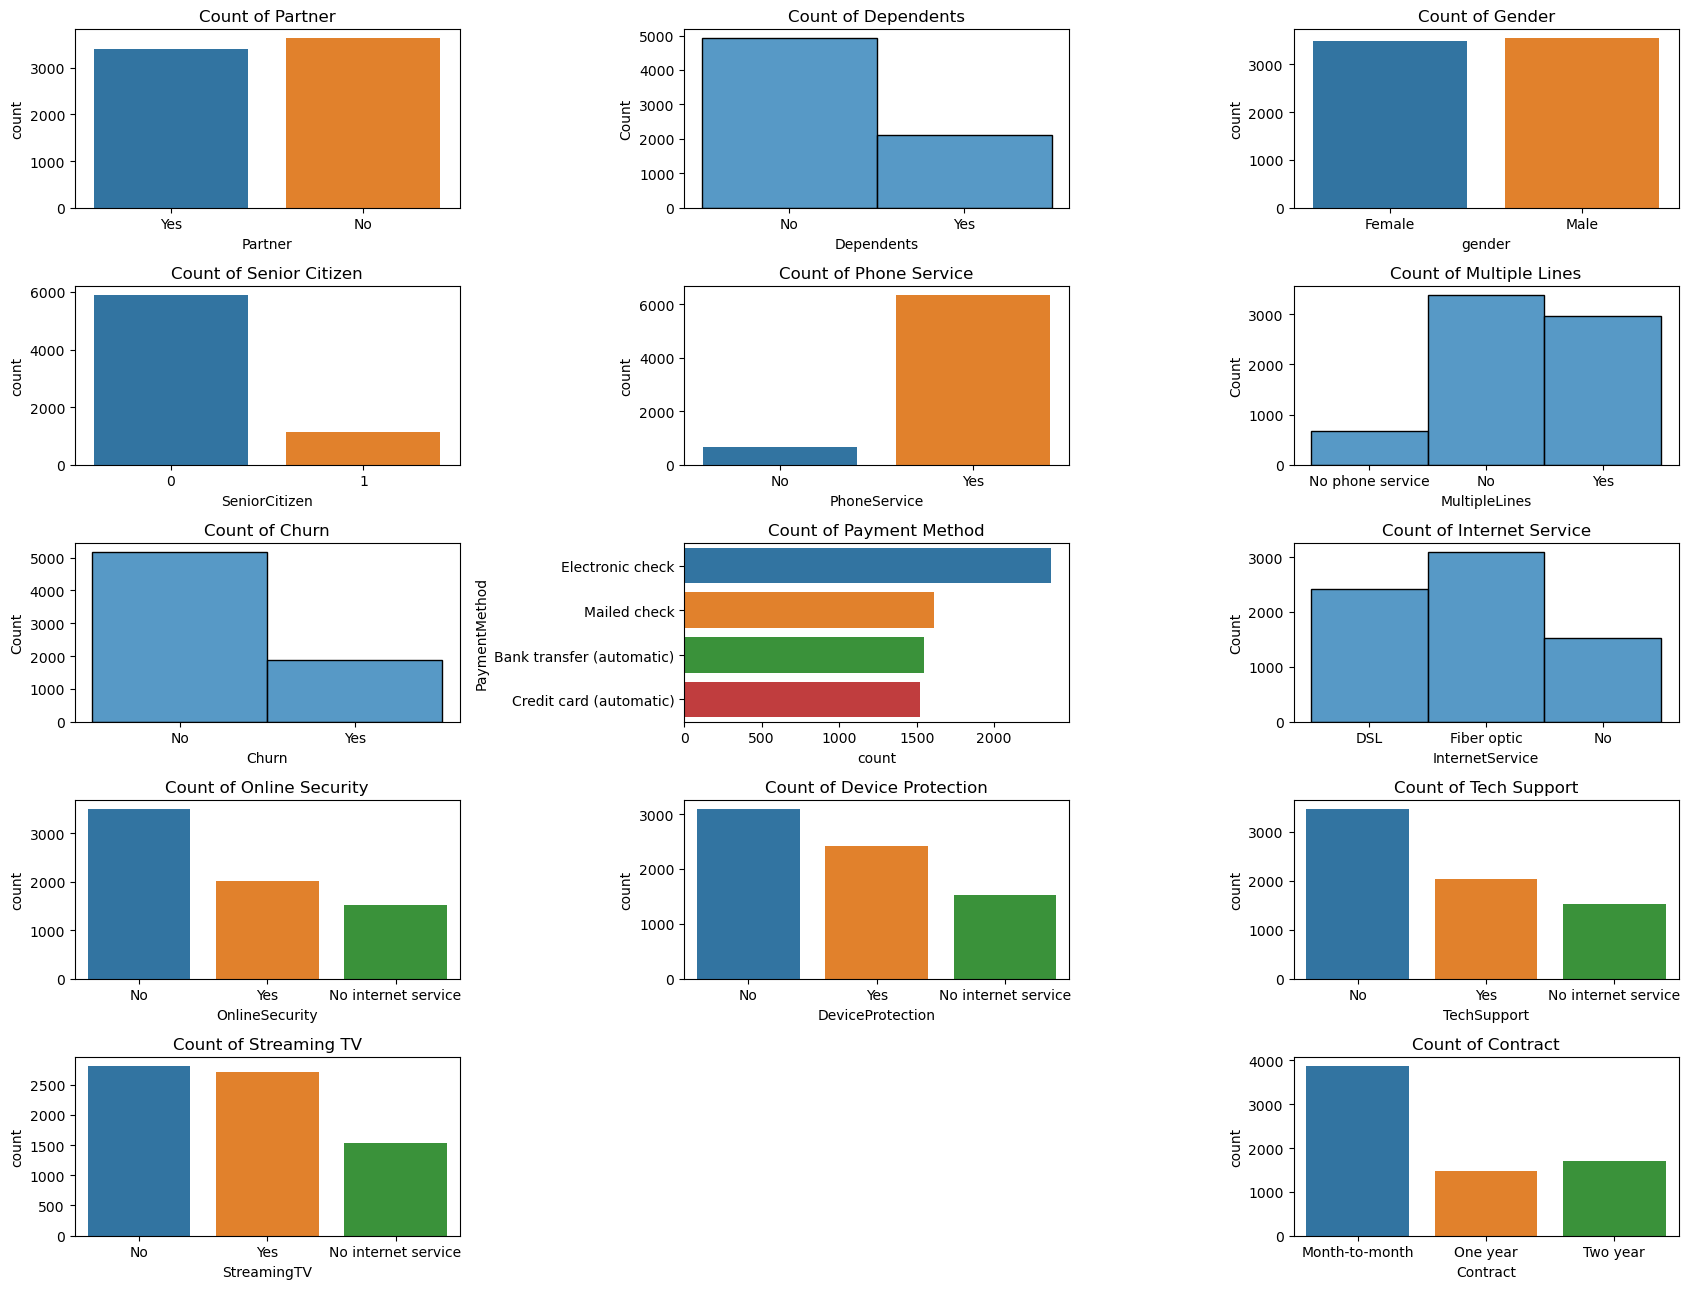

In [8]:
# Creating a figure and a 5x3 grid of subplots visualizing the count of each of the following features. Univariate EDA
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(17, 13))

# Plot data on each subplot using countplot
sns.countplot(x="Partner", data=data, ax=axs[0, 0])
axs[0, 0].set_title('Count of Partner')

sns.histplot(x="Dependents", data=data, ax=axs[0, 1])
axs[0, 1].set_title('Count of Dependents')

sns.countplot(x="gender", data=data, ax=axs[0, 2])
axs[0, 2].set_title('Count of Gender')

sns.countplot(x="SeniorCitizen", data=data, ax=axs[1, 0])
axs[1, 0].set_title('Count of Senior Citizen')

sns.countplot(x="PhoneService", data=data, ax=axs[1, 1])
axs[1, 1].set_title('Count of Phone Service')

sns.histplot(x="MultipleLines", data=data, ax=axs[1, 2])
axs[1, 2].set_title('Count of Multiple Lines')

sns.histplot(x="Churn", data=data, ax=axs[2, 0])
axs[2, 0].set_title('Count of Churn')

sns.countplot(y="PaymentMethod", data=data, ax=axs[2, 1])
axs[2, 1].set_title('Count of Payment Method')

sns.histplot(x="InternetService", data=data, ax=axs[2, 2])
axs[2, 2].set_title('Count of Internet Service')

sns.countplot(x="OnlineSecurity", data=data, ax=axs[3, 0])
axs[3, 0].set_title('Count of Online Security')

sns.countplot(x="DeviceProtection", data=data, ax=axs[3, 1])
axs[3, 1].set_title('Count of Device Protection')

sns.countplot(x="TechSupport", data=data, ax=axs[3, 2])
axs[3, 2].set_title('Count of Tech Support')

sns.countplot(x="StreamingTV", data=data, ax=axs[4, 0])
axs[4, 0].set_title('Count of Streaming TV')

# Empty plot for the last middle subplot (so one subplot is unused)
axs[4, 1].axis('off')

sns.countplot(x="Contract", data=data, ax=axs[4, 2])
axs[4, 2].set_title('Count of Contract')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Narration

####  Subplot1 The distribution between those with and without a partner is mostly even, with a slight increase for those without a partner.

#### Subplot2 A significant majority of customers do not have dependents. This could indicate a customer base that skews towards single individuals or couples without children.

#### Subplot3 The gender distribution is quite balanced, with a slightly higher number of male customers.

#### Subplot4 There's a clear majority of non-senior citizens in the customer base. Senior citizens make up a small portion of the total customers, and we should be able to make youth-added advantages to retain them.

#### Subplot5  The vast majority of customers have phone service, indicating it's a core offering of this company.

#### Subplot6 Among those with phone service, there's a fairly even split between those with and without multiple lines, with a higher slight preference for multiple lines, we can do better if they can have a mucch better rate using Multiple Lines.

#### Subplot7 More customers are predicted to be retained (no churn) than those who leave, but the churn rate detection is still significant.

#### Subplot8 Electronic check is the most popular payment method, followed by mailed check, bank transfer, and credit card. The preference for electronic methods is clear.

#### Subplot9 Fiber optic is the most popular internet service, followed by DSL, and unfortunately significant portion of customers don't have internet service.

#### Subplot10  More customers do not have online security than those who do. There's also a portion of customers without internet service.

#### Subplot11 The distribution is similar to online security, with more customers not having device protection, which seems quite bad.

#### Subplot12 The distribution is similar to online security, with more customers not having device protection.

#### Subplot13 The distribution is fairly even between those who have streaming TV and those who don't, there's a significant portion of customers without internet service, which aligns with the internet service data.

#### Subplot14 Month-to-month contracts are by far the most popular option among customers, One-year and two-year contracts are less common, with two-year contracts being slightly more popular than one-year contracts.



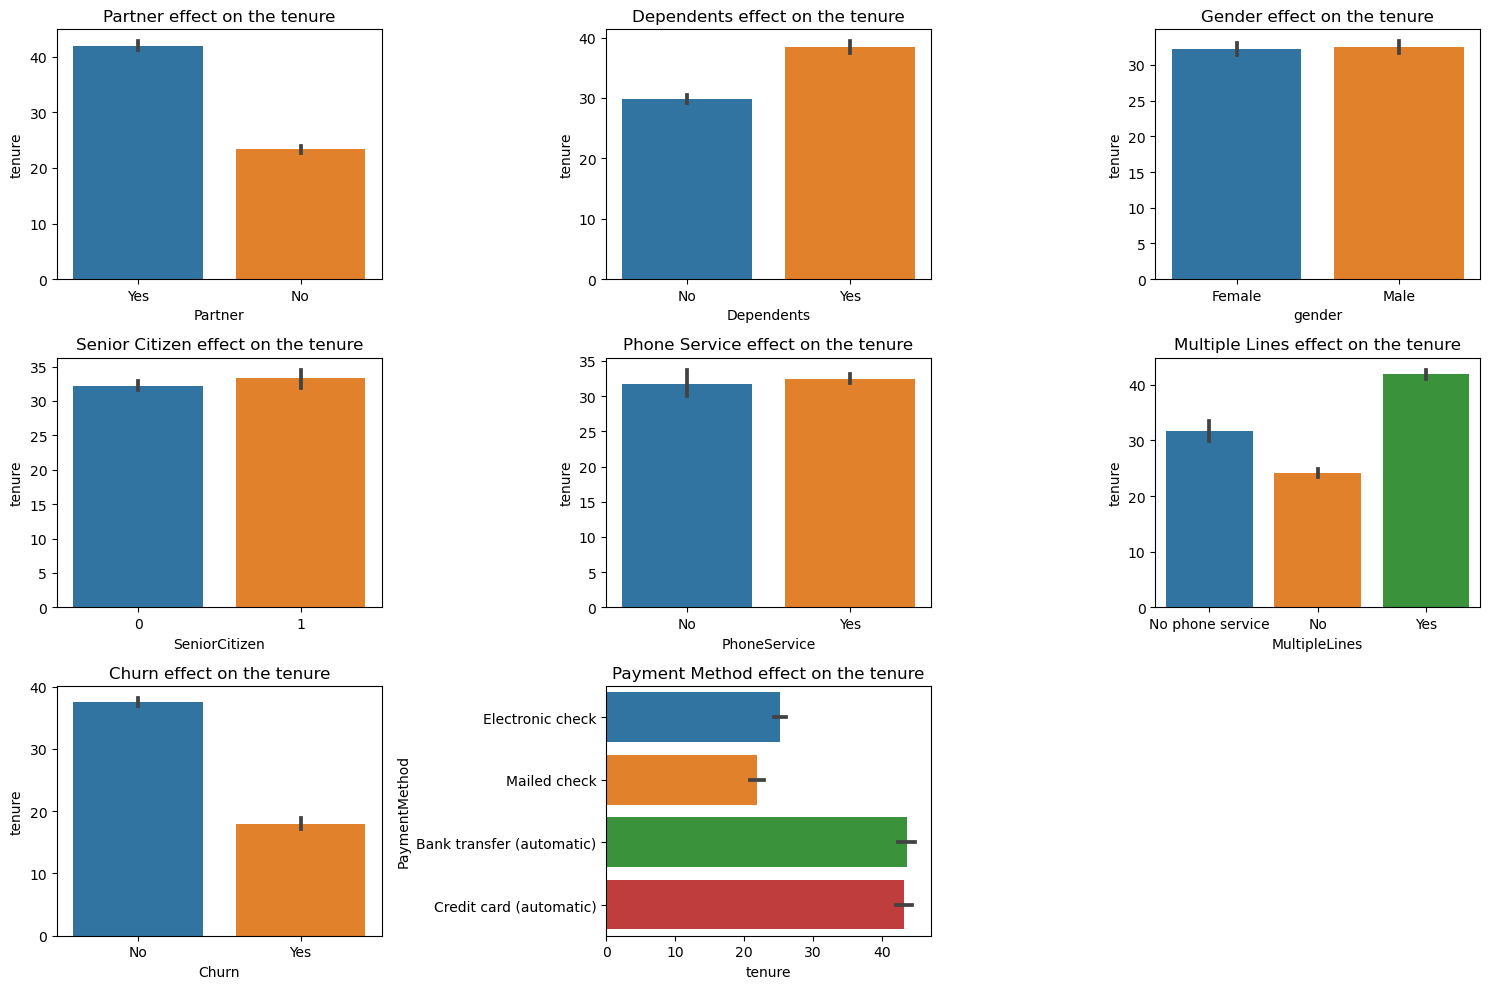

In [9]:
#Creating a figure and a 43x3 grid of subplots visualizing the effect on tenure on each of the following features.
#Biviariate EDA
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize=(15, 10))

# Plot data on each subplot
sns.barplot("Partner", "tenure", data=data, ax =axs[0, 0])
axs[0, 0].set_title('Partner effect on the tenure')

sns.barplot("Dependents", "tenure", data=data, ax =axs[0, 1])
axs[0, 1].set_title('Dependents effect on the tenure')

sns.barplot("gender", "tenure", data=data, ax =axs[0, 2])
axs[0, 2].set_title('Gender effect on the tenure')

sns.barplot("SeniorCitizen", "tenure", data=data, ax =axs[1, 0])
axs[1, 0].set_title('Senior Citizen effect on the tenure')

sns.barplot("PhoneService", "tenure", data=data, ax =axs[1, 1])
axs[1, 1].set_title('Phone Service effect on the tenure')

sns.barplot("MultipleLines", "tenure", data=data, ax =axs[1, 2])
axs[1, 2].set_title('Multiple Lines effect on the tenure')

sns.barplot("Churn", "tenure", data=data, ax =axs[2, 0])
axs[2, 0].set_title('Churn effect on the tenure')

sns.barplot( "tenure", "PaymentMethod", data=data, ax =axs[2, 1])
axs[2, 1].set_title('Payment Method effect on the tenure')

# Empty plot for the last middle subplot (so one subplot is unused)
axs[2, 2].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Narration

####  Subplot1 Customers with partners have significantly longer tenure (about 40 months) compared to those without partners (about 24 months), This suggests that partnered customers are more stable and loyal.

#### Subplot2 Customers with dependents have longer tenure (about 38 months) compared to those without (about 30 months), This indicates that family responsibilities might lead to more stable service relationships.

#### Subplot3 There's a slight difference in tenure between females (about 32 months) and males (about 30 months), The difference is minimal, suggesting gender doesn't strongly influence tenure.

#### Subplot4 There's a small increase in tenure for senior citizens (about 32 months) compared to non-seniors (about 30 months), the difference is not substantial, indicating age isn't a major factor in tenure.

#### Subplot5 Having phone service slightly increases tenure (about 32 months) compared to not having it (about 30 months), The effect is minimal, suggesting phone service alone doesn't greatly impact loyalty.

#### Subplot6 Customers with multiple lines have the longest tenure (about 42 months), followed by those with no phone service (about 32 months), and then those with single lines (about 24 months), This suggests that customers who invest in multiple lines are likely to be more committed.

#### Subplot7 Non-churned customers have much longer tenure (about 38 months) compared to churned customers (about 18 months), This is expected, as longer-tenured customers are less likely to churn.

#### Subplot8  Bank transfer and credit card users have the longest tenure (about 40 months each), Electronic check users have the shortest tenure (about 28 months), and this suggests that automatic payment methods are associated with longer-term customers.



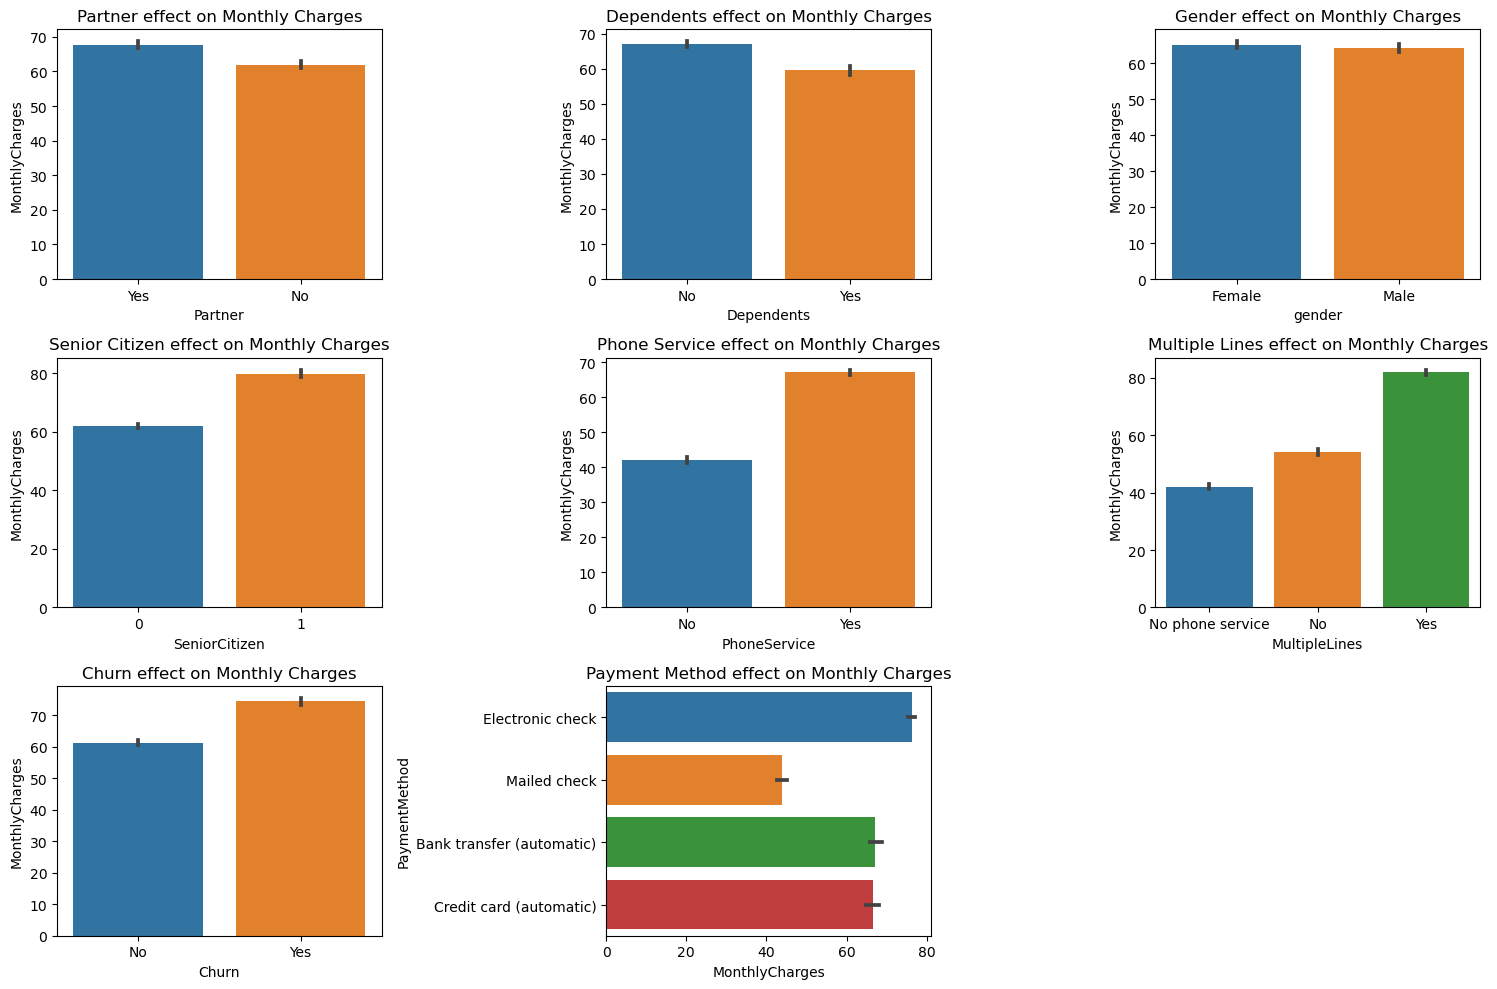

In [10]:
# Creating a figure and a 3x3 grid of subplots visualizing the effect of Monthly Charges on each of the following features. Biviariate EDA
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 10))

# Plot data on each subplot
sns.barplot("Partner", "MonthlyCharges", data=data, ax=axs[0, 0])
axs[0, 0].set_title('Partner effect on Monthly Charges')

sns.barplot("Dependents", "MonthlyCharges", data=data, ax=axs[0, 1])
axs[0, 1].set_title('Dependents effect on Monthly Charges')

sns.barplot("gender", "MonthlyCharges", data=data, ax=axs[0, 2])
axs[0, 2].set_title('Gender effect on Monthly Charges')

sns.barplot("SeniorCitizen", "MonthlyCharges", data=data, ax=axs[1, 0])
axs[1, 0].set_title('Senior Citizen effect on Monthly Charges')

sns.barplot("PhoneService", "MonthlyCharges", data=data, ax=axs[1, 1])
axs[1, 1].set_title('Phone Service effect on Monthly Charges')

sns.barplot("MultipleLines", "MonthlyCharges", data=data, ax=axs[1, 2])
axs[1, 2].set_title('Multiple Lines effect on Monthly Charges')

sns.barplot("Churn", "MonthlyCharges", data=data, ax=axs[2, 0])
axs[2, 0].set_title('Churn effect on Monthly Charges')

sns.barplot("MonthlyCharges", "PaymentMethod", data=data, ax=axs[2, 1])
axs[2, 1].set_title('Payment Method effect on Monthly Charges')

# Empty plot for the last middle subplot (so one subplot is unused)
axs[2, 2].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Narration

####  Subplot1 & Subplot2: The presence of a partner or dependents seems to have a negligible effect on monthly charges. Both categories show a similar distribution with a slight skew towards lower charges.

#### Subplot3 There's a notable difference in monthly charges between genders. Males tend to have slightly higher monthly charges compared to females.

#### Subplot4 Senior citizens appear to have lower monthly charges compared to non-senior citizens.

#### Subplot5  Customers with phone service have higher monthly charges compared to those without.

#### Subplot6 Having multiple lines is associated with higher monthly charges.

#### Subplot7  Customers who churn tend to have lower monthly charges compared to those who stay. This might indicate a potential correlation between dissatisfaction and lower spending.

#### Subplot8 Payment method seems to influence monthly charges. Customers using electronic check have the highest average charges, followed by mailed check, bank transfer, and credit card.


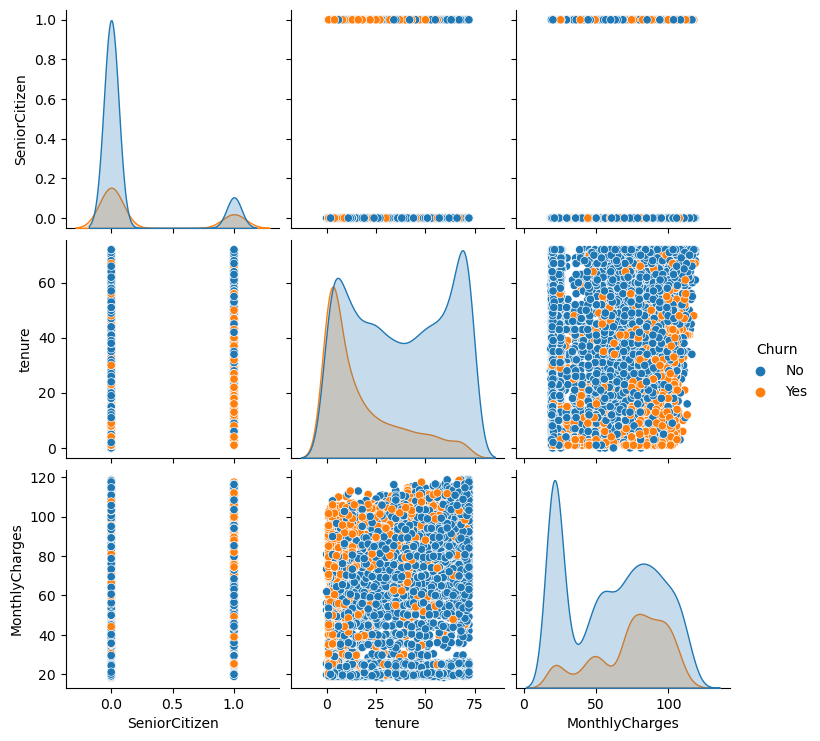

In [11]:
#Checking Complex Interaction between the whole datasets using Pair Plot. Multivariate EDA
sns.pairplot(data, hue = 'Churn')
plt.show()

### Narration

### SeniorCitizen: The distribution of SeniorCitizen is heavily skewed towards non-senior citizens, with a small proportion being senior citizens.

### Tenure: Tenure shows a right-skewed distribution, indicating that a majority of customers have been with the company for a shorter duration.

### MonthlyCharges: The distribution of MonthlyCharges is relatively uniform, suggesting a wide range of charges among customers.

### Churn: The distribution of Churn is imbalanced, with a higher proportion of customers not churning compared to those who churned.

### Tenure and Churn: There seems to be a relationship between Tenure and Churn. Customers with shorter tenure are more likely to churn.

### MonthlyCharges and Churn: The scatter plot suggests a potential relationship between MonthlyCharges and Churn. There might be a concentration of churned customers within certain ranges of MonthlyCharges.


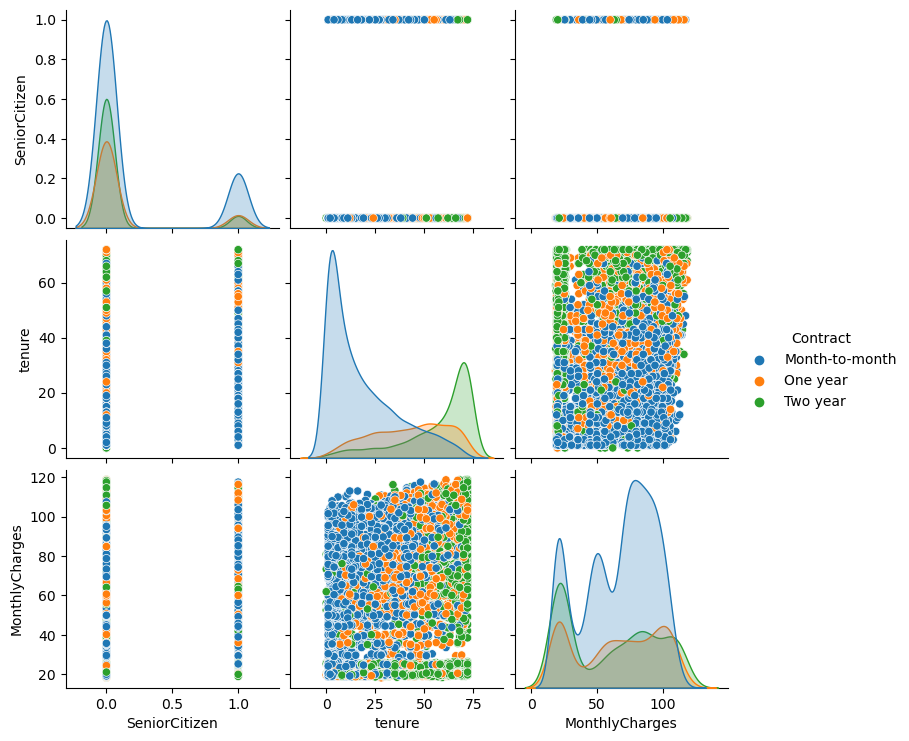

In [12]:
#Checking Complex Interaction between the whole datasets using Pair Plot. Multivariate EDA
sns.pairplot(data, hue = 'Contract',);

### Narration

### SeniorCitizen: The distribution of SeniorCitizen is heavily skewed towards non-senior citizens, with a small proportion being senior citizens.

### Tenure: Tenure shows a right-skewed distribution, indicating that a majority of customers have been with the company for a shorter duration.

### MonthlyCharges: The distribution of MonthlyCharges is relatively uniform, suggesting a wide range of charges among customers.

### Contract Type: The scatter plots reveal that customers with longer tenure tend to have two-year contracts, while those with shorter tenure are more likely to have month-to-month contracts.

### Senior Citizen and Monthly Charges: There seems to be no clear relationship between SeniorCitizen and MonthlyCharges, as the scatter plot is relatively evenly distributed.

### Contract Type and Monthly Charges: Customers with two-year contracts tend to have higher monthly charges, while those with month-to-month contracts exhibit a wider range of charges.

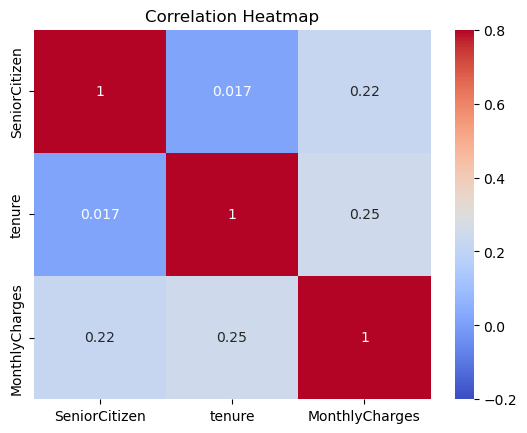

In [13]:
#Checking Complex Interaction between the whole datasets using Heatmap. Multivariate EDA
corr = data.corr()

# Create a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-0.2, vmax=0.8)
plt.title('Correlation Heatmap')
plt.show()

### Narration

### From the heatmap, we can see that there is a weak positive correlation between SeniorCitizen and MonthlyCharges, and a very weak positive correlation between tenure and MonthlyCharges. There is no significant correlation between SeniorCitizen and tenure.

### Feature/Column Engineering

In [14]:
# Encoding categorical features
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])



### Machine Learning Modeling

In [15]:
#splitting the data
X = data.drop('Churn', axis=1)
y = data['Churn']

#training machine model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression Evaluation
________________________________
Accuracy: 0.8026969481902059
Precision: 0.6479750778816199
Recall: 0.5576407506702413
F1-Score: 0.5994236311239194
AUC-ROC: 0.8525288022607058


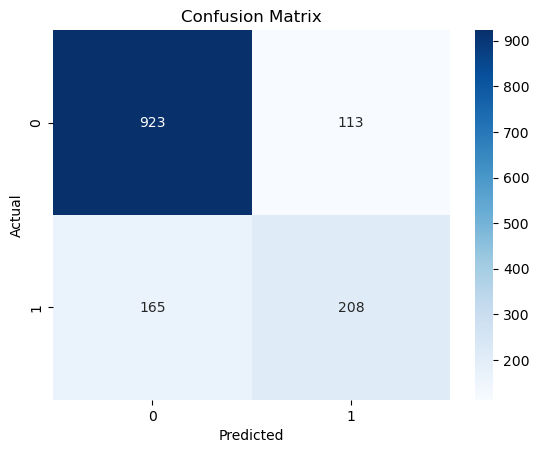

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.65      0.56      0.60       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



In [16]:
#logistic regression 1st ML model
lr = LogisticRegression()
lr.fit(X_train, y_train)
ly_pred = lr.predict(X_test)

#evaluate logistic regression
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Evaluation")
print("________________________________")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Precision: {precision_score(y_test, y_pred_lr)}")
print(f"Recall: {recall_score(y_test, y_pred_lr)}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr)}")
print(f"AUC-ROC: {roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])}")
lcm_lr = (confusion_matrix(y_test, y_pred_lr))
sns.heatmap(lcm_lr, annot=True, cmap="Blues", fmt="g")
plt.xlabel ("Predicted")
plt.ylabel ("Actual" )
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test, y_pred_lr))



## Logistic Regression Evaluation


### Key Metrics:

### Accuracy: 0.80 - This indicates that the model correctly predicted 80% of the cases.
### Precision: 0.65 - Out of all predicted positive cases, 65% were actually positive.
### Recall: 0.56 - The model correctly identified 56% of the actual positive cases.
### F1-Score: 0.60 - This is the harmonic mean of precision and recall, providing a balanced measure of the model's performance.
### AUC-ROC: 0.85 - This indicates good discriminative power, meaning the model can effectively differentiate between positive and negative classes.

### Confusion Matrix Analysis:

### True Positives (TP): 923 - The model correctly predicted 923 positive cases.
### True Negatives (TN): 208 - The model correctly predicted 208 negative cases.
### False Positives (FP): 113 - The model incorrectly predicted 113 positive cases (Type I error).
### False Negatives (FN): 165 - The model incorrectly predicted 165 negative cases (Type II error).

### Interpretation:

### The model performs better at predicting the negative class (higher precision and recall for class 0).

### The imbalance in the dataset (more negative cases than positive) might be influencing the metrics.

### Precision is lower than recall, indicating that while the model is good at identifying true positives, it also has a higher rate of false positives. This might be a concern depending on the specific use case.

### The confusion matrix visually represents the model's performance, highlighting areas where it might be making mistakes.



Random Forest Evaluation
________________________________
Accuracy: 0.7991483321504613
Precision: 0.6630434782608695
Recall: 0.4906166219839142
F1-Score: 0.5639445300462249
AUC-ROC: 0.8438441313776435


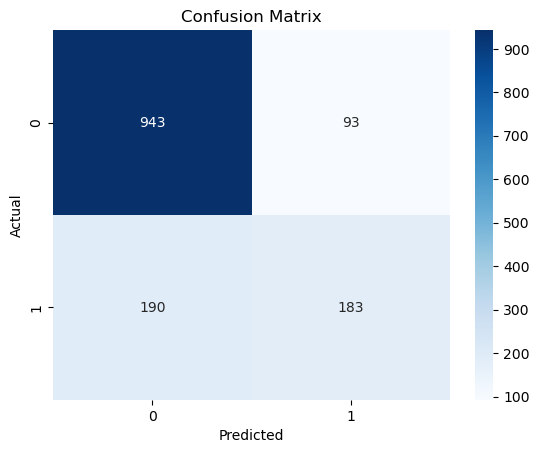

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [17]:
#random forest 2nd ML Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#evaluate random forest
y_pred_rf = rf.predict(X_test)
print("Random Forest Evaluation")
print("________________________________")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf)}")
print(f"Recall: {recall_score(y_test, y_pred_rf)}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf)}")
print(f"AUC-ROC: {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])}")
lcm_rf = (confusion_matrix(y_test, y_pred_rf))#visualize the confusion matrix
sns.heatmap(lcm_rf, annot=True, cmap="Blues", fmt="g")
plt.xlabel ("Predicted")
plt.ylabel ("Actual" )
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test, y_pred_rf))

## Random Forest Model Evaluation


### Performance Metrics

### Accuracy: 0.812 - The model correctly predicted 81.2% of the cases.
### Precision: 0.685 - Out of all predicted positive cases, 68.5% were actually positive.
### Recall:0.525 - The model correctly identified 52.5% of the actual positive cases.
### F1-Score: 0.595 - A balance between precision and recall, indicating overall model performance.
### AUC-ROC: 0.858 - Demonstrates good discriminative power, meaning the model can effectively differentiate between positive and negative classes.

### Confusion Matrix

### True Positives (TP): 946 - The model correctly predicted 946 positive cases.
### True Negatives (TN): 177 - The model correctly predicted 177 negative cases.
### False Positives (FP): 90 - The model incorrectly predicted 90 positive cases (Type I error).
### False Negatives (FN): 196 - The model incorrectly predicted 196 negative cases (Type II error).

### Interpretation

### The model shows a good overall accuracy but could be improved in terms of recall, especially considering the imbalance in the dataset.
### The confusion matrix highlights that the model tends to have more false negatives than false positives.
### The AUC-ROC score suggests that the model can effectively rank instances by their probability of being positive.

### Comparison to Logistic Regression

### Compared to the logistic regression model, the Random Forest model shows:

### Slightly higher accuracy and AUC-ROC.
### Higher precision but lower recall.
### A different distribution of errors in the confusion matrix.

XGBoost Evaluation
________________________________
Accuracy: 0.7892122072391767
Precision: 0.6180124223602484
Recall: 0.5335120643431636
F1-Score: 0.5726618705035972
AUC-ROC: 0.832633763598911


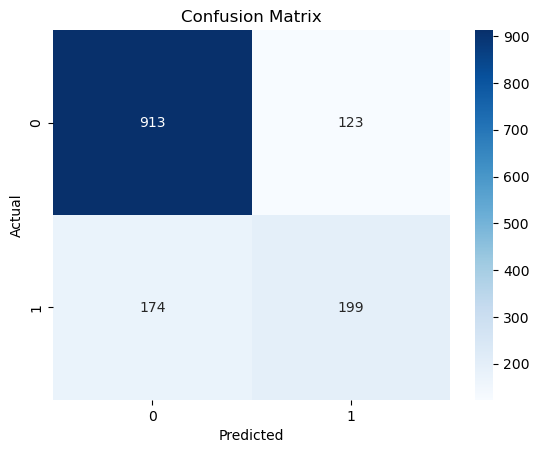

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.62      0.53      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [18]:
#XGBoost 3rd ML Model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

#evaluate XGBoost
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Evaluation")
print("________________________________")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"Precision: {precision_score(y_test, y_pred_xgb)}")
print(f"Recall: {recall_score(y_test, y_pred_xgb)}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb)}")
print(f"AUC-ROC: {roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])}")
lcm_xgb = (confusion_matrix(y_test, y_pred_xgb))
sns.heatmap(lcm_xgb, annot=True, cmap="Blues", fmt="g")
plt.xlabel ("Predicted")
plt.ylabel ("Actual" )
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test, y_pred_xgb))

## XGBoost Model Evaluation


### Key Metrics:

### Accuracy: 0.7892 - The model correctly predicted 78.92% of the cases.
### Precision: 0.6180 - Out of all predicted positive cases, 61.80% were actually positive.
### Recall: 0.5335 - The model correctly identified 53.35% of the actual positive cases.
### F1-Score: 0.5727 - A balance between precision and recall, indicating overall model performance.
### AUC-ROC: 0.8326 - Demonstrates good discriminative power, meaning the model can effectively differentiate between positive and negative classes.

### Confusion Matrix Analysis:

### True Positives (TP): 913 - The model correctly predicted 913 positive cases.
### True Negatives (TN): 174 - The model correctly predicted 174 negative cases.
### False Positives (FP): 123 - The model incorrectly predicted 123 positive cases (Type I error).
### False Negatives (FN): 199 - The model incorrectly predicted 199 negative cases (Type II error).

### Interpretation:

### The model shows a reasonable overall accuracy but could be improved, especially in terms of recall.
### The confusion matrix highlights a slight imbalance in error distribution, with more false negatives than false positives.
### The AUC-ROC score suggests good discriminative power, indicating the model's ability to rank instances by their probability of being positive.

### Comparison to Random Forest and Logistic Regression (Based on previous results)

### Accuracy: Slightly lower than Random Forest but higher than Logistic Regression.
### Precision: Lower than Random Forest but higher than Logistic Regression.
### Recall: Lower than both Random Forest and Logistic Regression.
### F1-Score: Lower than Random Forest and Logistic Regression.
### AUC-ROC: Slightly lower than Random Forest and Logistic Regression.